# Import bibliotek

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import MinMaxScaler

# Wybranie datasetu i podział na zbiory

In [17]:
def choose_dataset(train_data, test_data):
    train_data = train_data
    test_data = test_data
    return train_data, test_data

In [18]:
x = pd.read_csv("data/data2008.csv")
y = pd.read_csv('data/data2009.csv')

In [19]:
if (len(x)) > len(y):
    x = x[:len(y)]
else:
    y = y[:len(x)]

# Sprawdzenie istnienia brakujących wartości

In [20]:
x = x[x["RainTomorrow"].notna()]
y = y[y["RainTomorrow"].notna()]

# Wyświetl wartości kategoryczne i liczbowe

In [21]:
categorical = [col for col in x.columns if x[col].dtypes == 'O']

categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow',
 'Coordinates']

In [22]:
numerical = [col for col in x.columns if x[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

# Odrzucanie wartości wysoce skorelowanych

In [23]:
x = x.drop(['Temp3pm', 'Temp9am', 'Humidity9am'], axis=1)
y = y.drop(['Temp3pm', 'Temp9am', 'Humidity9am'], axis=1)

In [24]:
x.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'RainToday', 'RainTomorrow', 'Coordinates', 'Year', 'Month', 'Day'],
      dtype='object')

# Podział danych

In [25]:
X = x.drop(['RainTomorrow'], axis=1)

y = y['RainTomorrow']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((1816, 18), (454, 18))

# Zakodowanie zmiennej RainToday

In [27]:
encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

# Utworzenie zbioru treningowego.

In [28]:
print(X_train.columns)

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'RainToday_0', 'RainToday_1', 'Coordinates', 'Year', 'Month', 'Day'],
      dtype='object')


In [31]:
numerical = [col for col in numerical if col not in ['Humidity9am', 'Temp9am', 'Temp3pm']]

X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location),
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm),
                     pd.get_dummies(X_train.Coordinates)], axis=1)

# Utworzenie zbioru testowego.

In [32]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                    pd.get_dummies(X_test.Location),
                    pd.get_dummies(X_test.WindGustDir),
                    pd.get_dummies(X_test.WindDir9am),
                    pd.get_dummies(X_test.WindDir3pm),
                    pd.get_dummies(X_test.Coordinates)], axis=1)

In [52]:
cols = X_train.columns

MultiIndex([(             'MinTemp',),
            (             'MaxTemp',),
            (            'Rainfall',),
            (       'WindGustSpeed',),
            (        'WindSpeed9am',),
            (        'WindSpeed3pm',),
            (         'Humidity3pm',),
            (         'Pressure9am',),
            (         'Pressure3pm',),
            (                'Year',),
            ...
            ('(-35.3075, 149.1244)',),
            ('(-35.4235, 149.0754)',),
            (    '(-35.55, 148.75)',),
            ('(-36.0736, 146.9135)',),
            ('(-36.7667, 144.2667)',),
            (    '(-37.55, 143.85)',),
            ('(-37.8136, 144.9631)',),
            ('(-37.8333, 140.7667)',),
            ('(-41.4593, 147.1472)',),
            ('(-42.8806, 147.3256)',)],
           length=108)


In [34]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [35]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [36]:
X_test = pd.DataFrame(X_test, columns=[cols])

# Trenowanie modelu

In [37]:
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

# Kodowanie zmiennych kategorycznych

In [38]:
'''from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cleaned_data['Location'] = le.fit_transform(cleaned_data['Location'])
cleaned_data['WindDir9am'] = le.fit_transform(cleaned_data['WindDir9am'])
cleaned_data['WindDir3pm'] = le.fit_transform(cleaned_data['WindDir3pm'])
cleaned_data['WindGustDir'] = le.fit_transform(cleaned_data['WindGustDir'])
'''

"from sklearn import preprocessing\nle = preprocessing.LabelEncoder()\ncleaned_data['Location'] = le.fit_transform(cleaned_data['Location'])\ncleaned_data['WindDir9am'] = le.fit_transform(cleaned_data['WindDir9am'])\ncleaned_data['WindDir3pm'] = le.fit_transform(cleaned_data['WindDir3pm'])\ncleaned_data['WindGustDir'] = le.fit_transform(cleaned_data['WindGustDir'])\n"

In [39]:
X_train.columns

MultiIndex([(             'MinTemp',),
            (             'MaxTemp',),
            (            'Rainfall',),
            (       'WindGustSpeed',),
            (        'WindSpeed9am',),
            (        'WindSpeed3pm',),
            (         'Humidity3pm',),
            (         'Pressure9am',),
            (         'Pressure3pm',),
            (                'Year',),
            ...
            ('(-35.3075, 149.1244)',),
            ('(-35.4235, 149.0754)',),
            (    '(-35.55, 148.75)',),
            ('(-36.0736, 146.9135)',),
            ('(-36.7667, 144.2667)',),
            (    '(-37.55, 143.85)',),
            ('(-37.8136, 144.9631)',),
            ('(-37.8333, 140.7667)',),
            ('(-41.4593, 147.1472)',),
            ('(-42.8806, 147.3256)',)],
           length=108)

# Predykcja wyników

In [40]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No',

In [41]:
logreg.predict_proba(X_test)[:, 0]

array([0.80241366, 0.77827905, 0.81546173, 0.91504598, 0.78311943,
       0.88130419, 0.54960873, 0.88753862, 0.80247608, 0.90427689,
       0.7824152 , 0.82409187, 0.76749728, 0.76580965, 0.85933894,
       0.80939991, 0.82552888, 0.80232058, 0.93924146, 0.74442449,
       0.93232958, 0.6914833 , 0.85879509, 0.88843587, 0.91126589,
       0.80483736, 0.83707873, 0.63071546, 0.91880873, 0.78761308,
       0.75461638, 0.67699361, 0.85532905, 0.90194054, 0.91160532,
       0.83786628, 0.85189811, 0.76046861, 0.69858488, 0.73588563,
       0.82572349, 0.78239208, 0.87147133, 0.49784471, 0.94731985,
       0.89803403, 0.72927118, 0.76263907, 0.90695096, 0.83990482,
       0.80374189, 0.67279922, 0.82648361, 0.80746742, 0.53638755,
       0.69583779, 0.82796539, 0.8835843 , 0.77430896, 0.61739164,
       0.93886372, 0.88036716, 0.89292378, 0.64444974, 0.96096193,
       0.94470835, 0.84167659, 0.71109335, 0.92912436, 0.90844126,
       0.36086158, 0.69878187, 0.87843414, 0.91498994, 0.93514

In [42]:
logreg.predict_proba(X_test)[:, 1]

array([0.19758634, 0.22172095, 0.18453827, 0.08495402, 0.21688057,
       0.11869581, 0.45039127, 0.11246138, 0.19752392, 0.09572311,
       0.2175848 , 0.17590813, 0.23250272, 0.23419035, 0.14066106,
       0.19060009, 0.17447112, 0.19767942, 0.06075854, 0.25557551,
       0.06767042, 0.3085167 , 0.14120491, 0.11156413, 0.08873411,
       0.19516264, 0.16292127, 0.36928454, 0.08119127, 0.21238692,
       0.24538362, 0.32300639, 0.14467095, 0.09805946, 0.08839468,
       0.16213372, 0.14810189, 0.23953139, 0.30141512, 0.26411437,
       0.17427651, 0.21760792, 0.12852867, 0.50215529, 0.05268015,
       0.10196597, 0.27072882, 0.23736093, 0.09304904, 0.16009518,
       0.19625811, 0.32720078, 0.17351639, 0.19253258, 0.46361245,
       0.30416221, 0.17203461, 0.1164157 , 0.22569104, 0.38260836,
       0.06113628, 0.11963284, 0.10707622, 0.35555026, 0.03903807,
       0.05529165, 0.15832341, 0.28890665, 0.07087564, 0.09155874,
       0.63913842, 0.30121813, 0.12156586, 0.08501006, 0.06485

# Dokładność

In [43]:
print('Model accuracy score: {0:0.4f}'. format(
    accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8172


# Macierz pomyłek

In [44]:
cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0, 0])

print('\nTrue Negatives(TN) = ', cm[1, 1])

print('\nFalse Positives(FP) = ', cm[0, 1])

print('\nFalse Negatives(FN) = ', cm[1, 0])

Confusion matrix

 [[370   4]
 [ 79   1]]

True Positives(TP) =  370

True Negatives(TN) =  1

False Positives(FP) =  4

False Negatives(FN) =  79


# Wizualizacja macierzy pomyłek z heatmapą seaborn


<Axes: >

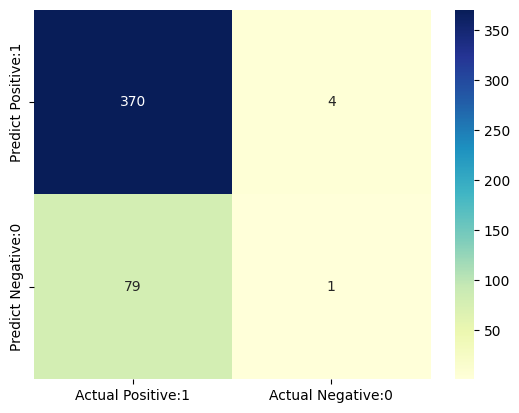

In [45]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                         index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Dokładność klasyfikatora


In [46]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8172


# Precyzja klasyfikatora

In [47]:
precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9893


In [48]:
y_pred1 = logreg.predict_proba(X_test)[:, 1]

# Krzywa ROC

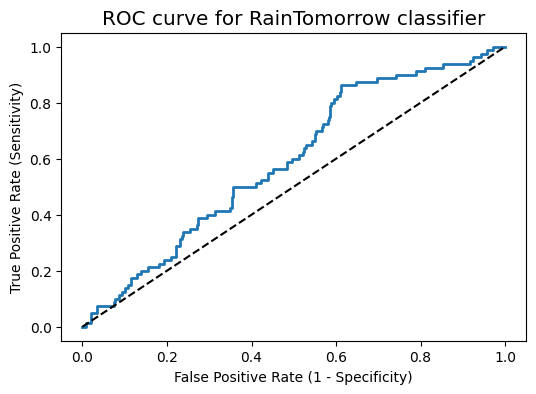

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label='Yes')

plt.figure(figsize=(6, 4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0, 1], [0, 1], 'k--')

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# Eskport modelu

In [53]:
filename = "model.h5"
pickle.dump(logreg, open(filename, 'wb'))
with open('encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)



In [56]:
total_features = len(numerical) - len(['Temp3pm', 'Temp9am', 'Humidity9am'])
total_features += 2
total_features += sum([len(x[column].unique()) for column in categorical])
print(total_features)

109
